<a href="https://colab.research.google.com/github/Eranlaz/pandas/blob/main/Hello_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
bpi =pd.read_csv('https://raw.githubusercontent.com/Eranlaz/hh_data/main/for_quiz_BP1%20-%20for_quiz_BP1.csv?token=GHSAT0AAAAAAB5E3I7PK2MDHIRVLTUJDGFMY5ZEUIQ')
we1 =pd.read_csv('https://raw.githubusercontent.com/Eranlaz/hh_data/main/for_quiz_WE1%20-%20for_quiz_WE1.csv?token=GHSAT0AAAAAAB5E3I7ODFLMAEEFLEW6EUQOY5ZEUUA')
bs1 =pd.read_csv('https://raw.githubusercontent.com/Eranlaz/hh_data/main/for_quiz_BS1%20-%20for_quiz_BS1.csv?token=GHSAT0AAAAAAB5E3I7OLBXP23MO7VGAVSRIY5ZEVBA')

In [7]:
bpi['bp_date'] = pd.to_datetime(bpi['bp_date'])
we1['weight_date'] = pd.to_datetime(we1['weight_date'])
bs1['bs_date'] = pd.to_datetime(bs1['bs_date'])
bpi['year_month'] = bpi['bp_date'].dt.strftime('%Y-%m')
bs1['year_month'] = bs1['bs_date'].dt.strftime('%Y-%m')
we1['year_month'] = we1['weight_date'].dt.strftime('%Y-%m')

In [15]:
def  get_counts_per_month(bpi,we1,bs1):
  cons=pd.concat([bpi, we1, bs1])
  threshold = cons['systolic'].quantile(0.95)
  clean_data=cons[cons['systolic'] < threshold]
  result=clean_data.groupby(['year_month'])['id'].sum()
  return result
  

  

In [16]:
get_counts_per_month(bpi,we1,bs1)

year_month
2019-01    4225
2019-02    4385
2019-03    6875
2019-04    3469
2019-05    5377
2019-06    5533
2019-07    5415
2019-08    3625
2019-09    4057
2019-10    4798
2019-11    4955
2019-12    6453
2020-01    6536
2020-02    4686
2020-03    4047
2020-04    5766
2020-05    5154
2020-06    1632
2020-07    5549
2020-08    6132
2020-09    4189
2020-10    6095
2020-11    4667
2020-12    4367
2021-01     649
Name: id, dtype: int64

In [17]:
csv=get_counts_per_month(bpi,we1,bs1)

In [18]:
csv.to_csv('count_per_month.csv', index=False, sep='\t', header=False)

**Part 3**

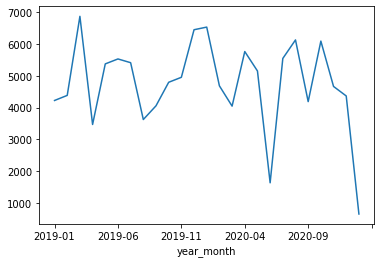

In [20]:
csv.plot(x='date', y='id', kind='line');

In [21]:
bp_per_user_per_week=pd.read_csv('https://raw.githubusercontent.com/Eranlaz/hh_data/main/bp_per_user_per_week.csv?token=GHSAT0AAAAAAB5E3I7OOAHHPFA763YZXTYKY5ZFKQQ')

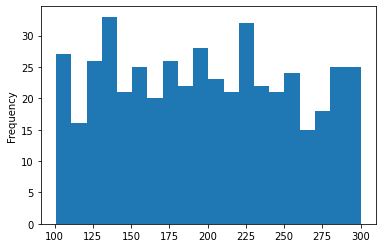

In [22]:
bp_per_user_per_week['avg_sys'].plot(kind='hist', bins = 20)

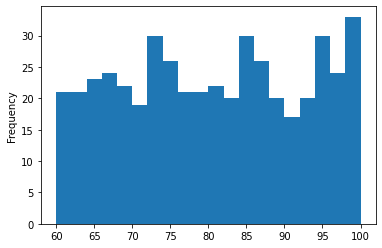

In [23]:
bp_per_user_per_week['avg_dias'].plot(kind='hist', bins = 20)

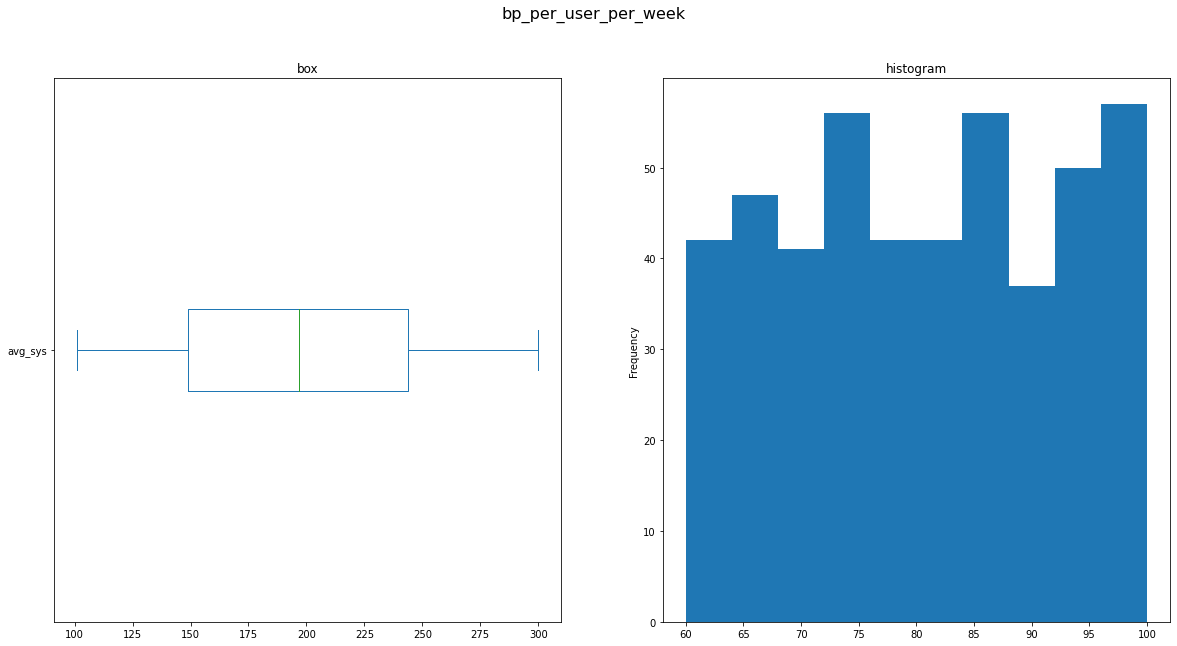

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

bp_per_user_per_week['avg_sys'].plot(kind='box',  ax=axes[0], title='box', vert=False)
bp_per_user_per_week['avg_dias'].plot(kind='hist', ax=axes[1], title='histogram')

fig.suptitle('bp_per_user_per_week', fontsize=16);

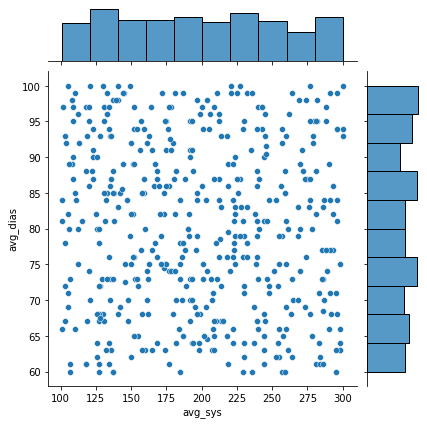

In [29]:
sns.jointplot(x='avg_sys', y='avg_dias', data=bp_per_user_per_week);